In [47]:
# DEPENDENCIES
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# structure modelling
import model_build

# response calculation
import newmark_beta

In [48]:
# Excitation Generation
nt = 6000
dt = 0.01 
F = np.zeros((5, nt))
F[4, 10:21] = 1000
signal_length = nt

In [49]:
# Structure Modeling
nDOF = 5
me = 1000
ke = 50000
zeta = 0.05
M, K, C = model_build.model_build(nDOF, me, ke, zeta)

In [50]:
# Response Calculation
gamma = 0.5
beta = 0.25
acc = newmark_beta.newmark_beta(signal_length, nDOF, M, C, K, F, dt, beta, gamma)

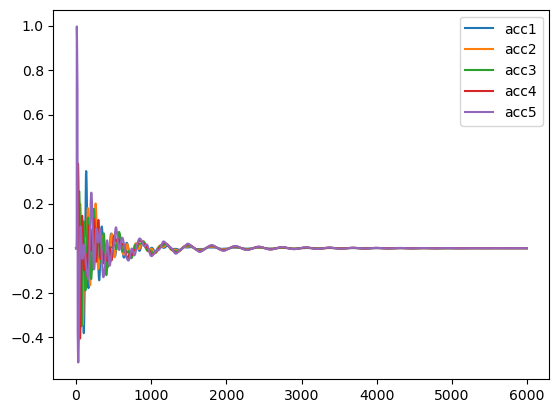

In [51]:
# plot acc (all channels)

plt.figure()
plt.plot(acc[0, :], label='acc1')
plt.plot(acc[1, :], label='acc2')
plt.plot(acc[2, :], label='acc3')
plt.plot(acc[3, :], label='acc4')
plt.plot(acc[4, :], label='acc5')
plt.legend()
plt.show()


The dominant frequency of floor 1 is: 0.9765625 Hz


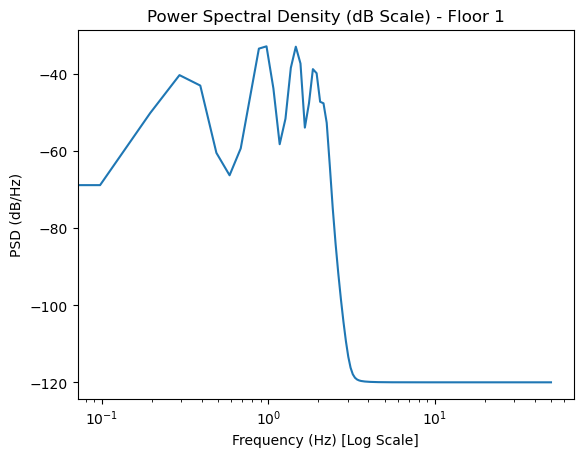

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Select the floor data to analyze (0 for the first floor, 1 for the second, etc.)
floor_index = 0  # Analyze the first floor

# Extract the acceleration data of the selected floor
acceleration = acc[floor_index, :]

# Sampling frequency determined by dt
fs = 1 / dt

# Estimate PSD using Welch's method; nperseg can be adjusted based on data length
freq, psd = welch(acceleration, fs=fs, nperseg=1024)

# Convert PSD to dB scale; add a small value eps to avoid log(0)
eps = 1e-12
psd_db = 10 * np.log10(psd + eps)

# Find the dominant frequency by locating the frequency corresponding to the maximum PSD
dominant_index = np.argmax(psd)
dominant_frequency = freq[dominant_index]
print("The dominant frequency of floor", floor_index + 1, "is:", dominant_frequency, "Hz")

# Plot the PSD: the x-axis is in log scale
plt.figure()
plt.semilogx(freq, psd_db)  # Use semilogx to convert the x-axis to a logarithmic scale
plt.xlabel('Frequency (Hz) [Log Scale]')
plt.ylabel('PSD (dB/Hz)')
plt.title('Power Spectral Density (dB Scale) - Floor ' + str(floor_index + 1))
plt.show()